# Project: Stock Market Analysis and Prediction

## Scrapping Stock Data From Yahoo Finance

## Introduction

   Stock Market Analysis and Prediction is a project on technical analysis, visualization and prediction using data provided by Yahoo Finance. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. 
   
### Questions

In this analysis, we have explored the following questions-

1. Visualize the historical prices.
2. Visualize the volume traded and identify the months in which the volume was the maximum.
3. What is the moving average of the various stocks?
4. What are the daily returns of the stocks?
5. What is the distribution of returns of stocks?
6. What is the correlation between different stocks' closing prices?
7. What is the correlation between different stocks' daily returns?
8. What is the volatility of stocks? 
9. How much value do we put at risk by investing in a particular stock?
10. How can we attempt to forecast future stock behavior?

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import plotly.figure_factory as ff
import plotly.express as px
import cufflinks as cf
import yfinance as yf
plt.style.use('dark_background')
%matplotlib inline

#### Stocks taken from IT Sector. 1 year Daily Data
- Infosys
- HCL
- TCS
- Wipro

In [2]:
start_date = date.today()-relativedelta(years=1)
end_date = date.today() 
print("Capturing stock data from", start_date, "to", end_date)

Capturing stock data from 2020-09-14 to 2021-09-14


In [3]:
infosys_ticker="INFY.BO"
wipro_ticker="WIPRO.BO"
hcl_ticker="HCLTECH.BO"
tcs_ticker="TCS.BO"

In [4]:
infosys=yf.download(infosys_ticker, start_date, end_date)
infosys

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-09-14   949.500000   991.049988   948.849976   977.950012   957.234741   
2020-09-15   979.950012   994.000000   972.000000   981.900024   961.101074   
2020-09-16   990.950012  1006.000000   982.299988  1001.049988   979.845398   
2020-09-17   996.000000  1020.599976   994.650024  1010.650024   989.242065   
2020-09-18  1015.950012  1018.599976   999.000000  1002.549988   981.313660   
...                 ...          ...          ...          ...          ...   
2021-09-06  1707.000000  1732.000000  1700.000000  1730.000000  1730.000000   
2021-09-07  1732.000000  1735.000000  1704.750000  1706.500000  1706.500000   
2021-09-08  1704.449951  1704.449951  1683.500000  1693.000000  1693.000000   
2021-09-09  1687.900024  1694.949951  1682.199951  1691.800049  1691.800049   
2021-09-13  1688.000000  1701.000000  1675.000000  1691.000000  1691.000000   

             Volume  
Date                 
2020-09-14   652772  
2020-09-15   232236  
2020-09-16  1413638  
2020-09-17   370943  
2020-09-18   358949  
...             ...  
2021-09-06   144430  
2021-09-07    94610  
2021-09-08    88073  
2021-09-09    55551  
2021-09-13   151233  

[247 rows x 6 columns]

In [5]:
hcl=yf.download(hcl_ticker, start_date, end_date)
hcl.tail()

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-09-06  1177.000000  1209.000000  1174.099976  1199.699951  1199.699951   
2021-09-07  1210.000000  1213.050049  1180.500000  1182.400024  1182.400024   
2021-09-08  1182.599976  1191.000000  1166.949951  1188.599976  1188.599976   
2021-09-09  1191.150024  1204.849976  1182.800049  1198.699951  1198.699951   
2021-09-13  1190.000000  1214.900024  1176.699951  1207.599976  1207.599976   

            Volume  
Date                
2021-09-06  105902  
2021-09-07   87874  
2021-09-08  118959  
2021-09-09   63591  
2021-09-13  144899

In [6]:
tcs=yf.download(tcs_ticker, start_date, end_date)
tcs.tail()

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  Volume
Date                                                                          
2021-09-06  3847.0  3876.000000  3815.000000  3851.050049  3851.050049   42444
2021-09-07  3858.0  3871.000000  3809.050049  3814.750000  3814.750000   33828
2021-09-08  3815.0  3815.000000  3756.000000  3774.100098  3774.100098   53706
2021-09-09  3799.0  3809.699951  3765.149902  3791.750000  3791.750000   38234
2021-09-13  3761.0  3851.899902  3761.000000  3843.899902  3843.899902   82516

In [7]:
wipro=yf.download(wipro_ticker, start_date, end_date)
wipro.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2021-09-06  656.400024  688.900024  656.400024  686.849976  686.849976  432519
2021-09-07  690.799988  690.799988  672.700012  674.200012  674.200012  320400
2021-09-08  675.200012  676.200012  660.000000  662.349976  662.349976  196242
2021-09-09  661.000000  664.599976  654.000000  662.200012  662.200012  261806
2021-09-13  663.400024  671.900024  658.000000  670.799988  670.799988  328486

In [8]:
#summary stats
infosys.describe()

Open         High          Low        Close    Adj Close  \
count   247.000000   247.000000   247.000000   247.000000   247.000000   
mean   1342.585017  1356.077526  1328.389677  1342.400809  1331.824735   
std     199.805290   199.425857   200.183209   200.251414   206.335404   
min     949.500000   991.049988   948.849976   975.349976   954.689758   
25%    1166.750000  1171.524963  1152.099976  1163.800049  1151.373352   
50%    1340.000000  1351.000000  1325.250000  1339.449951  1325.147705   
75%    1470.000000  1478.650024  1458.525024  1467.125000  1467.125000   
max    1748.000000  1755.599976  1731.750000  1741.449951  1741.449951   

             Volume  
count  2.470000e+02  
mean   5.111546e+05  
std    5.532691e+05  
min    5.555100e+04  
25%    2.031245e+05  
50%    3.296580e+05  
75%    5.488105e+05  
max    4.505456e+06

In [9]:
print(infosys.head())
print(hcl.head())
print(wipro.head())
print(tcs.head())

                   Open         High         Low        Close   Adj Close  \
Date                                                                        
2020-09-14   949.500000   991.049988  948.849976   977.950012  957.234741   
2020-09-15   979.950012   994.000000  972.000000   981.900024  961.101074   
2020-09-16   990.950012  1006.000000  982.299988  1001.049988  979.845398   
2020-09-17   996.000000  1020.599976  994.650024  1010.650024  989.242065   
2020-09-18  1015.950012  1018.599976  999.000000  1002.549988  981.313660   

             Volume  
Date                 
2020-09-14   652772  
2020-09-15   232236  
2020-09-16  1413638  
2020-09-17   370943  
2020-09-18   358949  
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-09-14  739.000000  807.799988  739.000000  794.900024  774.871460  908021
2020-09-15  787.000000  809.849976  783.000000  792.400024  772.43444

#### Ques-1. Visualize the historical prices.

<AxesSubplot:title={'center':'HCL Historical Price Chart'}, xlabel='Date', ylabel='Closing Price'>

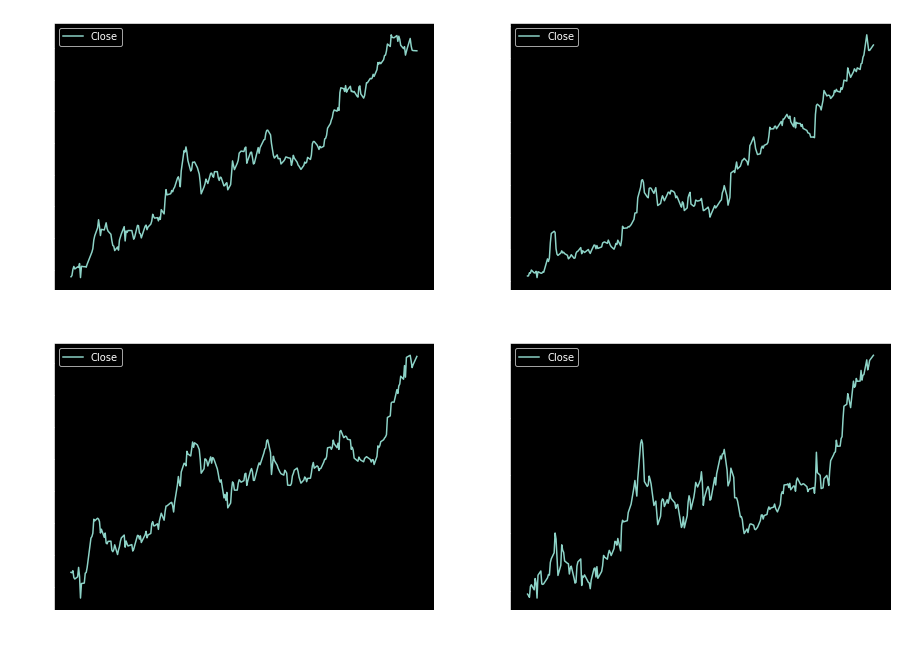

In [10]:
# Let's see a historical view of the closing prices
figure, axis = plt.subplots(2, 2)
infosys['Close'].plot(ax=axis[0,0],xlabel="Date", ylabel="Closing Price", 
                      title="Infosys Historical Price Chart" ,legend=True, figsize=(15,12))

wipro['Close'].plot(ax=axis[0,1],xlabel="Date", ylabel="Closing Price", 
                      title="Wipro Historical Price Chart" ,legend=True, figsize=(15,12))

tcs['Close'].plot(ax=axis[1,0],xlabel="Date", ylabel="Closing Price", 
                      title="TCS Historical Price Chart" ,legend=True, figsize=(15,12))

hcl['Close'].plot(ax=axis[1,1],xlabel="Date", ylabel="Closing Price", 
                      title="HCL Historical Price Chart" ,legend=True, figsize=(15,12))


#### Ques-2. Visualize the volume traded and identify the months in which the volume was the maximum.

<AxesSubplot:title={'center':'HCL Historical Volume Chart'}, xlabel='Date', ylabel='Volume Traded'>

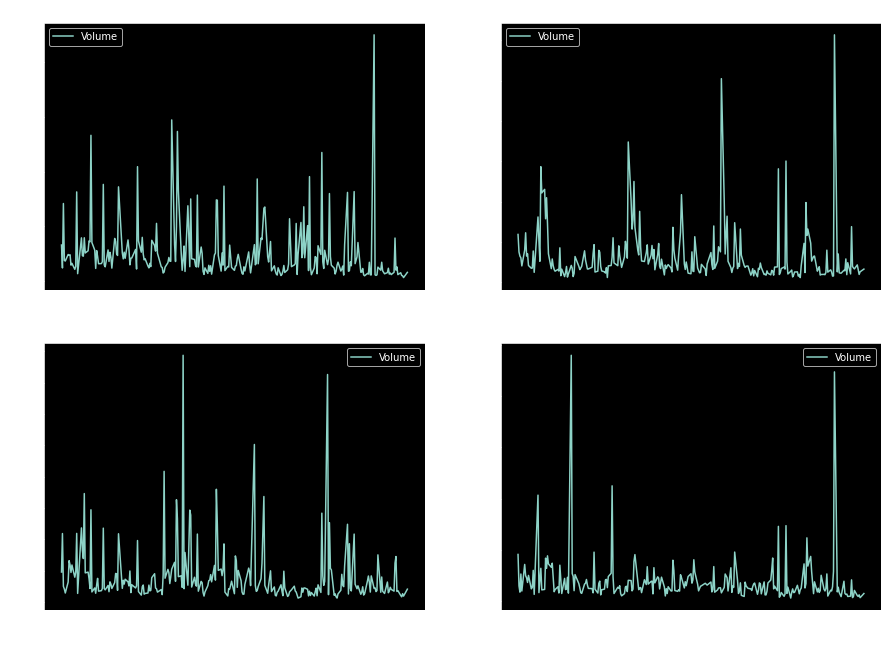

In [12]:
# Now let's plot the total volume of stock being traded each day over the past year
figure, axis = plt.subplots(2, 2)

infosys['Volume'].plot(ax=axis[0,0], xlabel="Date", ylabel="Volume Traded", 
                      title="Infosys Historical Volume Chart" ,legend=True, figsize=(15,12))

wipro['Volume'].plot(ax=axis[0,1], xlabel="Date", ylabel="Volume Traded", 
                      title="Wipro Historical Volume Chart" ,legend=True, figsize=(15,12))

tcs['Volume'].plot(ax=axis[1,0], xlabel="Date", ylabel="Volume Traded", 
                      title="TCS Historical Volume Chart" ,legend=True, figsize=(15,12))

hcl['Volume'].plot(ax=axis[1,1], xlabel="Date", ylabel="Volume Traded", 
                      title="HCL Historical Volume Chart" ,legend=True, figsize=(15,12))

The above volume graphs easily help us to analyse that during this year which months had the maximum trading volume for all four companies. 

#### Ques-3. What is the moving average of the various stocks?

#### Moving Averages
- A moving average (MA) is a stock indicator that is commonly used in technical analysis.
- The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.
- A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.
- Shorter moving averages are typically used for short-term trading, while longer-term moving averages are more suited for long-term investors.
- A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates that it is in a downtrend.

In [13]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
infosys["MA10"]=infosys['Close'].rolling(10).mean()
infosys["MA20"]=infosys['Close'].rolling(20).mean()
infosys["MA50"]=infosys['Close'].rolling(50).mean()
infosys["MA100"]=infosys['Close'].rolling(100).mean()

infosys[["Close", "MA10", "MA20", "MA50", "MA100"]].iplot(asFigure=True,theme="solar", 
                                                        title="Infosys Close Price & Moving Averages")

In [14]:
tcs["MA10"]=tcs['Close'].rolling(10).mean()
tcs["MA20"]=tcs['Close'].rolling(20).mean()
tcs["MA50"]=tcs['Close'].rolling(50).mean()
tcs["MA100"]=tcs['Close'].rolling(100).mean()

tcs[["Close", "MA10", "MA20", "MA50", "MA100"]].iplot(asFigure=True,theme="solar", 
                                                        title="TCS Close Price & Moving Averages")

In [15]:
wipro["MA10"]=wipro['Close'].rolling(10).mean()
wipro["MA20"]=wipro['Close'].rolling(20).mean()
wipro["MA50"]=wipro['Close'].rolling(50).mean()
wipro["MA100"]=wipro['Close'].rolling(100).mean()

wipro[["Close", "MA10", "MA20", "MA50", "MA100"]].iplot(asFigure=True,theme="solar", 
                                                        title="Wipro Close Price & Moving Averages")

In [16]:
hcl["MA10"]=hcl['Close'].rolling(10).mean()
hcl["MA20"]=hcl['Close'].rolling(20).mean()
hcl["MA50"]=hcl['Close'].rolling(50).mean()
hcl["MA100"]=hcl['Close'].rolling(100).mean()

hcl[["Close", "MA10", "MA20", "MA50", "MA100"]].iplot(asFigure=True,theme="solar", 
                                                        title="HCL Close Price & Moving Averages")

#### Ques-4. What are the daily returns of the stocks?

In [17]:
infosys['Daily Return'] = infosys['Close'].pct_change()
tcs['Daily Return'] = tcs['Close'].pct_change()
hcl['Daily Return'] = hcl['Close'].pct_change()
wipro['Daily Return'] = wipro['Close'].pct_change()

In [18]:
# creating a dataframe comprising of daily returns of all four stocks

returns=pd.DataFrame.merge(infosys["Daily Return"], wipro["Daily Return"], how="right", on="Date")
returns1=pd.DataFrame.merge(returns, tcs["Daily Return"], how="right", on="Date")
daily_returns=pd.DataFrame.merge(returns1, hcl["Daily Return"], how="right", on="Date")
daily_returns.columns=["Infosys Returns", "Wipro Returns", "TCS Returns", "HCL Returns"]

# removing NaNs
daily_returns=daily_returns.dropna()
daily_returns.head()

Infosys Returns  Wipro Returns  TCS Returns  HCL Returns
Date                                                                
2020-09-15         0.004039       0.000488    -0.000823    -0.003145
2020-09-16         0.019503       0.015620     0.004979    -0.003849
2020-09-17         0.009590      -0.001442    -0.017022     0.023627
2020-09-18        -0.008015       0.015562    -0.003780     0.003837
2020-09-21         0.006733      -0.014376     0.005651    -0.010849

In [19]:
# plotting daily returns
daily_returns.iplot(fill=True, asFigure=True, theme="solar")

From the above charts we can easily visualise which stocks gave maximum returns and in which month.

#### Ques-5. What is the distribution of returns of stocks?

In [20]:
daily_returns.iplot(kind='box',asFigure = True, theme="solar")

#### Ques-6. What is the correlation between different stocks' closing prices?

In [21]:
# creating a dataframe comprising of closing prices of all four stocks

closing=pd.DataFrame.merge(infosys["Close"], wipro["Close"], how="right", on="Date")
close=pd.DataFrame.merge(closing, tcs["Close"], how="right", on="Date")
closing_prices=pd.DataFrame.merge(close, hcl["Close"], how="right", on="Date")
closing_prices.columns=["Infosys Close", "Wipro Close", "TCS Close", "HCL Close"]
closing_prices.head() 

Infosys Close  Wipro Close    TCS Close   HCL Close
Date                                                           
2020-09-14     977.950012   307.149994  2492.300049  794.900024
2020-09-15     981.900024   307.299988  2490.250000  792.400024
2020-09-16    1001.049988   312.100006  2502.649902  789.349976
2020-09-17    1010.650024   311.649994  2460.050049  808.000000
2020-09-18    1002.549988   316.500000  2450.750000  811.099976

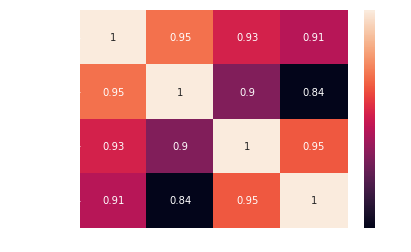

In [22]:
# correlation matrix between closing prices of all stocks
corrmatrix=closing_prices.corr()
sn.heatmap(corrmatrix, annot=True)
plt.show()

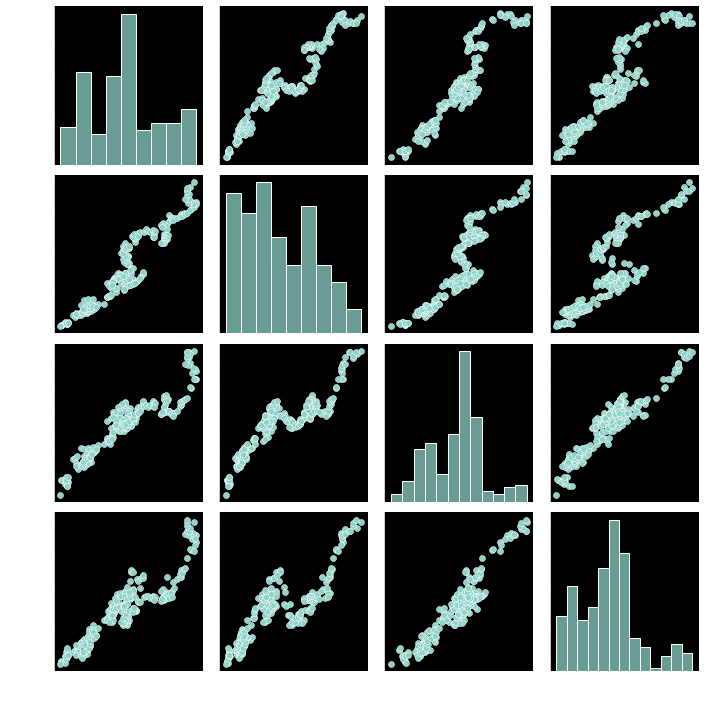

In [23]:
sn.pairplot(closing_prices.dropna())

#### Ques-7. What is the correlation between different stocks' daily returns?

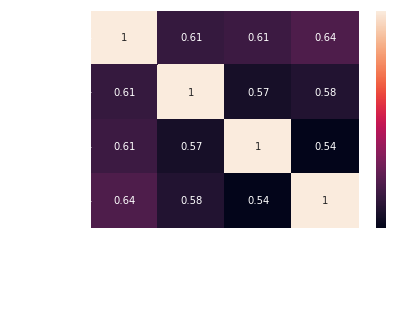

In [24]:
# correlation matrix between closing prices of all stocks
corrmatrix1=daily_returns.corr()
sn.heatmap(corrmatrix1, annot=True)
plt.show()

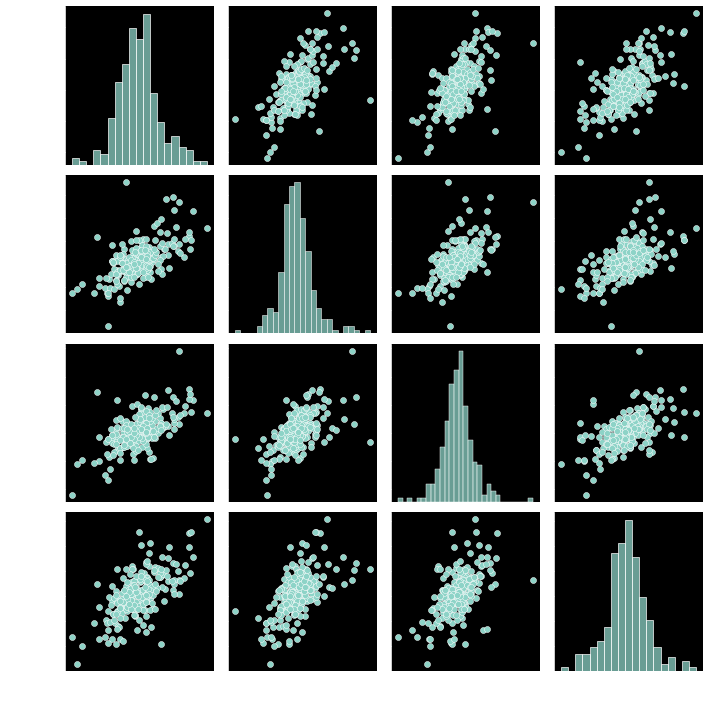

In [25]:
sn.pairplot(daily_returns.dropna())

#### Ques-8. What is the volatility of stocks?

In [26]:
# calculating standard deviations
daily_returns.std()

Infosys Returns    0.014066
Wipro Returns      0.019127
TCS Returns        0.014572
HCL Returns        0.016956
dtype: float64

The volatility is defined as the annualized standard deviation. Using the above formula we can calculate volatility as follows:

In [27]:
infosys_volatility=daily_returns["Infosys Returns"].std()*252**.5
wipro_volatility=daily_returns["Wipro Returns"].std()*252**.5
tcs_volatility=daily_returns["TCS Returns"].std()*252**.5
hcl_volatility=daily_returns["HCL Returns"].std()*252**.5

print("Infosys Volatility", infosys_volatility)
print("Wipro Volatility", wipro_volatility)
print("TCS Volatility", tcs_volatility)
print("HCL Volatility", hcl_volatility)

Infosys Volatility 0.2232921737761074
Wipro Volatility 0.3036266460108878
TCS Volatility 0.23133087266975258
HCL Volatility 0.2691691944007617


Text(0.5, 1.0, 'HCL Volatility= 27.0')

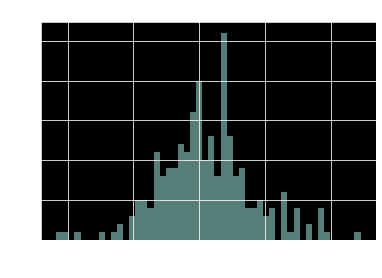

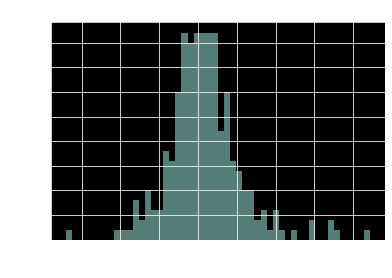

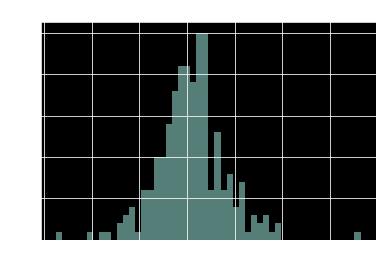

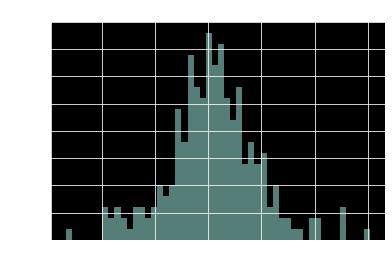

In [28]:
# visualising volatility of stock returns
str_vol_i = str(round(infosys_volatility,4)*100)
str_vol_w = str(round(wipro_volatility,2)*100)
str_vol_t = str(round(tcs_volatility,4)*100)
str_vol_h = str(round(hcl_volatility,2)*100)


fig, ax = plt.subplots()
daily_returns["Infosys Returns"].hist(ax=ax, bins=50,alpha=0.6)
ax.set_xlabel("Returns")
ax.set_ylabel("Frequency of Return")
ax.set_title("Infosys Volatility= " + str_vol_i)

fig, ax = plt.subplots()
daily_returns["Wipro Returns"].hist(ax=ax, bins=50,alpha=0.6)
ax.set_xlabel("Returns")
ax.set_ylabel("Frequency of Return")
ax.set_title("Wipro Volatility= " + str_vol_w)

fig, ax = plt.subplots()
daily_returns["TCS Returns"].hist(ax=ax, bins=50,alpha=0.6)
ax.set_xlabel("Returns")
ax.set_ylabel("Frequency of Return")
ax.set_title("TCS Volatility= " + str_vol_t)

fig, ax = plt.subplots()
daily_returns["HCL Returns"].hist(ax=ax, bins=50,alpha=0.6)
ax.set_xlabel("Returns")
ax.set_ylabel("Frequency of Return")
ax.set_title("HCL Volatility= " + str_vol_h)



#### Ques-9. How much value do we put at risk by investing in a particular stock?

Value at Risk margin is a measure of risk. It is used to estimate the probability of loss of value of a share or a portfolio, based on the statistical analysis of historical price trends and volatilities.
A stock with a 10% VaR margin requirement means that there may be a potential loss of 10% in the value of the stock in one day with a given level of confidence—say 99%.


3 methods of calculating VaR:
- Historical or Bootstrap Method
- Variance-Covariance Method
- Monte Carlo Simulation Method


#### VaR using the Historical Price Method


In [29]:
print("Value at Risk for Infosys is- ", daily_returns["Infosys Returns"].quantile(0.05))
print("Value at Risk for Wipro is- ",daily_returns["Wipro Returns"].quantile(0.05))
print("Value at Risk for TCS is- ",daily_returns["TCS Returns"].quantile(0.05))
print("Value at Risk for HCL is- ",daily_returns["HCL Returns"].quantile(0.05))

Value at Risk for Infosys is-  -0.01843849082165322
Value at Risk for Wipro is-  -0.02571531646049091
Value at Risk for TCS is-  -0.02198975507030118
Value at Risk for HCL is-  -0.026939795286772095


For Infosys, the 0.05 empirical quantile of daily returns is at -0.018. That means that with 95% confidence, our worst daily loss will not exceed 1.8%. If we have a 1 million dollar investment, our one-day 5% Value at Risk (VaR) is 0.018 * 1,000,000 = $18,000.

#### Ques-10. How can we attempt to forecast future stock behavior?

The forecast has been done using ARIMA(5,1,0) model. 

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
# split into train and test sets
X = daily_returns["Infosys Returns"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [32]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.001021, expected=-0.007649
predicted=-0.005314, expected=0.009379
predicted=-0.003847, expected=0.008125
predicted=-0.001378, expected=-0.002537
predicted=-0.000726, expected=0.002170
predicted=0.000514, expected=0.011385
predicted=0.005650, expected=-0.004835
predicted=0.003337, expected=0.010199
predicted=0.003442, expected=0.026030
predicted=0.008076, expected=0.005224
predicted=0.008292, expected=0.000107
predicted=0.006016, expected=-0.007937
predicted=0.005951, expected=-0.004485
predicted=0.007053, expected=-0.005514
predicted=0.000609, expected=0.007066
predicted=-0.000665, expected=-0.003095
predicted=-0.003496, expected=0.003176
predicted=-0.001439, expected=0.016803
predicted=0.002771, expected=0.001239
predicted=0.003773, expected=0.006963
predicted=0.004434, expected=0.015584
predicted=0.007631, expected=0.010126
predicted=0.010115, expected=0.007835
predicted=0.008135, expected=0.005058
predicted=0.008074, expected=0.011315
predicted=0.010624, expected=0.00497

C:\Users\GARIMA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.005233, expected=0.011935


C:\Users\GARIMA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.012931, expected=-0.013154


C:\Users\GARIMA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.003727, expected=0.004454
predicted=0.000495, expected=0.007465
predicted=0.000420, expected=-0.010512
predicted=-0.000128, expected=0.000832
predicted=-0.001495, expected=-0.002110
predicted=-0.000836, expected=0.001442
predicted=0.000770, expected=-0.009471
predicted=-0.003899, expected=-0.001970
predicted=-0.002497, expected=0.020713
predicted=0.002139, expected=0.002156
predicted=0.001204, expected=-0.016010
predicted=-0.002299, expected=-0.008489
predicted=-0.000964, expected=0.005124
predicted=0.003168, expected=0.026134
predicted=0.004162, expected=0.000094
predicted=-0.002049, expected=0.008615
predicted=0.002879, expected=-0.000904
predicted=0.006081, expected=0.001685
predicted=0.009027, expected=0.007195
predicted=0.005453, expected=-0.004082
predicted=0.002440, expected=0.013104
predicted=0.004015, expected=0.013946
predicted=0.005308, expected=-0.002993
predicted=0.004384, expected=0.003456
predicted=0.004315, expected=-0.002719
predicted=0.005012, expected=0.0

C:\Users\GARIMA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.003134, expected=0.009560


C:\Users\GARIMA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.001676, expected=-0.005900
predicted=-0.001536, expected=-0.010713
predicted=-0.001881, expected=-0.006204
predicted=-0.004453, expected=0.003711
predicted=-0.000960, expected=-0.015726
predicted=-0.006060, expected=0.006618
predicted=-0.004639, expected=0.007018
predicted=-0.002506, expected=0.017467
predicted=0.003029, expected=-0.013584
predicted=-0.002073, expected=-0.007911
predicted=0.001122, expected=-0.000709
predicted=0.002420, expected=-0.000473


In [33]:
# evaluate forecasts
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.011


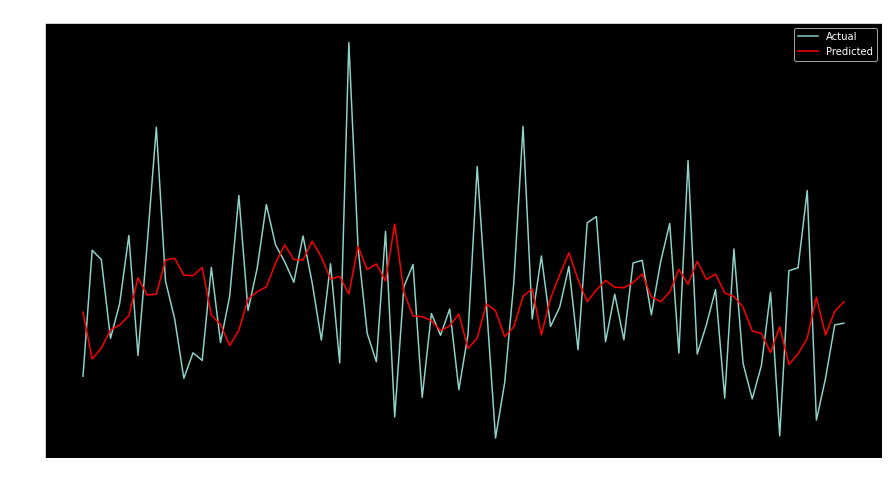

In [34]:
# plot forecasts against actual outcomes
from matplotlib import pyplot
pyplot.figure(figsize=(15,8))
pyplot.plot(test, label="Actual")
pyplot.plot(predictions, color='red', label="Predicted")
pyplot.legend()
pyplot.title("Actual VS Predicted Returns of Infosys")
pyplot.show()